**[Back to Fan's Intro Stat Table of Content](https://fanwangecon.github.io/Stat4Econ/)**

# Possion Probability Distribution

We looked at the binomial probability distribution [Discrete Random Variable and Binomial Experiment](https://fanwangecon.github.io/Stat4Econ/probability/binomial.html).

Now we look at the poisson distribution

## Poisson Probability Distribution

Suppose you run a restaurant, maybe you know on average how many guests arrive on a weekday night between 6 and 9, but every night the exact number might be different, what is the distribution of guest arrivals? By chance, there could be $0$ guests, there could also be a lot more guest than average potentially. We use the poisson distribution to think about these arrival probabilities. 

For us to use the Poisson distribution, the experiment we study need to have these two properties (ASWCC P250): 

1. "The probability of an occurrence is the same for any two intervals of equal length."
2. "The occurrence or nonoccurrence in any interval is independent of the occurrence or nonoccurrence in any other interval."

### Poisson Sample Space

Guests arrive at your restaurant between 6 and 9 on a weekday night, 0 guest could arrive, 1, 2, 3, ..., 10, 11, 13, ... , 20, 21, 22, .... Unlike in the Binomial case, where we have a maximum number of games that we can win out of $n$ games played, here we don't impose a maximum number of guests that can arrive.

- Experiment: arrivals
- Experimental outcomes: $x=0,x=1,...,...$, unlike the bionomial, there is no limit here
- Sample Space: $S=\left\{0,1,...,...\right\}$ (the support is infinite)

### Poisson Probability Mass Funcion

What is the probability of having $x$ arrivals during an interval of time given that the expected (mean) number of arrival in that interval of time is $\mu$? The answer is given by this formula, which is the poisson probability mass function:
$$
\begin{eqnarray}
f(x;\mu) &=& \frac{\mu^{x} \cdot e^{-\mu}}{x!}\\         
\end{eqnarray}
$$

With the poisson experiment, we have this formula to assign probabilities. The formula has two inputs, $x$ and $\mu$. $e=2.71828$ is not a parameter, it is a fixed number like $\pi$, it is a mathematical constant. You need to tell R, Excel, or alternative programs what these two numbers $x$ and $\mu$ are, and the program will spit a probability out for you. $\mu$ is the parameter.

### Poisson Expected Value and Variance

For the Poisson discrete random variable, it turns out the expected value and variance are:
$$E(x) = \mu$$
$$Var(x) = \mu$$

We can check by summing over : $E(x) = \mu_x = \Sigma x \cdot f(x)$ and $Var(x) = \sigma_x^2 = \Sigma \left( (x - \mu_x)^2 \cdot f(x) \right)$, and we will always end up with these two results. Note that if we are actually adding up terms, since there is no maximum arrival limit, we have to approximate the summation up to a large number of arrivals.


## Poisson Example: Horse-Kicking

Using data from the [Prussian Army](https://en.wikipedia.org/wiki/Prussian_Army) on "number of soldiers killed by being kicked by a horse each year in each of 14 cavalry corps over a 20-year period", [Ladislaus Bortkiewicz](https://en.wikipedia.org/wiki/Ladislaus_Bortkiewicz) showed in 1898 in [Gesetz der kleinen Zahlen (The Rule of Small Numbers)](https://de.wikipedia.org/wiki/Gesetz_der_kleinen_Zahlen) that this followed the Poisson distribution. This is one of the most famous examples of the Poisson Distribution.

He found that there was 0.70 deaths per one corps per one year. 

### Chance of 2 death per year per corp

- $x=2$: 2 death in a corp in a year by horse-kick
- $\mu=0.70$

For example, the chance that $2$ soldier from a corp in a year die of horse kick:
$$f\left(x=2;\mu=0.7\right) = \frac{0.7^{2} \cdot e^{-0.7}}{2!} = 0.122$$

We can use the r function, *dpois*, to calculate these probabilites: *dpois(2, 0.7)*. Additionally, *ppois(2,0.7)* calculates the cumulative probability that at most 2 die from horse-kick in a corp in a year.

### Distributional Graphs Horse Kicking Death Per Corp Per Year

We can see from the results below that given our parameter $\mu=0.7$, there is almost a 50 percent chance that a corp has no death from horse kick in a year. And the chances that 1, 2, 3 and 4 Prussian soldiers die from horse-kick are 35, 12, 3, and 0.5 percent. 

The chance that at least 2 soldiers die from each corp each year is 16 percent. 

If you are running the Prussian Army, you would want to know these statistics. You would want to track these statistics overtime and try to improve training etc. 

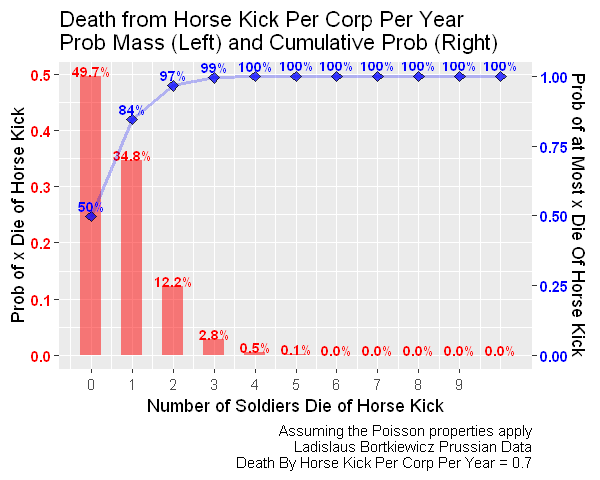

In [3]:
library(tidyverse)

# Parameters
n <- 10
mu <- 0.70

# Generate Data
# A vector of different survival counts
zero2large <- 0:n
# Probability for different survival counts
prob_of_diekicks <- dpois(zero2large, mu)
# Cumulative Probability for different survival counts, before dbinom, now pbinom
cumulative_prob_of_diekicks <- ppois(zero2large, mu)
# Data File that Includes Cumulative Probability and Mass
diekick.prob <- tibble(diekicks=(zero2large), prob=prob_of_diekicks, cum.prob=cumulative_prob_of_diekicks)

# Control Graph Size
options(repr.plot.width = 5, repr.plot.height = 4)
# Two axis colors
axis.sec.ratio <- max(cumulative_prob_of_diekicks)/max(prob_of_diekicks)
right.axis.color <- 'blue'
left.axis.color <- 'red'

# Probabilities
diekick.graph <- diekick.prob %>%
    ggplot(aes(x=diekicks)) + 
    geom_bar(aes(y=prob),
             stat='identity', alpha=0.5, width=0.5, fill=left.axis.color) + 
    geom_text(aes(y=prob,
                  label = paste0(sprintf('%2.1f', prob*100), '%')),
              vjust = -0., size = 3, color=left.axis.color, fontface='bold') 

# Cumulative Probabilities
diekick.graph <- diekick.graph + 
    geom_line(aes(y=cum.prob/axis.sec.ratio),
              alpha=0.25, size=1, color=right.axis.color) + 
    geom_point(aes(y=cum.prob/axis.sec.ratio),
               alpha=0.75, size=2, shape=23, fill=right.axis.color) + 
    geom_text(aes(y=cum.prob/axis.sec.ratio,
                  label = paste0(sprintf('%2.0f', cum.prob*100), '%')),
              vjust = -0.5, size = 3, color=right.axis.color, fontface='bold')


# Graph Strings
graph.title <- sprintf(
    paste0('Death from Horse Kick Per Corp Per Year\n',
           'Prob Mass (Left) and Cumulative Prob (Right)'))
graph.caption <- sprintf(
    paste0('Assuming the Poisson properties apply\n',
           'Ladislaus Bortkiewicz Prussian Data\n',
           'Death By Horse Kick Per Corp Per Year = %s'), mu)
graph.title.x <- 'Number of Soldiers Die of Horse Kick'
graph.title.y.axisleft <- 'Prob of x Die of Horse Kick'
graph.title.y.axisright <- 'Prob of at Most x Die Of Horse Kick'

# Graphing
diekick.graph <- diekick.graph + 
    labs(title = graph.title,
         x = graph.title.x,
         y = graph.title.y.axisleft,
         caption = graph.caption) +
    scale_y_continuous(sec.axis = 
                       sec_axis(~.*axis.sec.ratio,
                                name = graph.title.y.axisright)) +
    scale_x_continuous(labels = zero2large[floor(seq(1,n,length.out=10))],
                       breaks = zero2large[floor(seq(1,n,length.out=10))]) +
    theme(axis.text.y = element_text(face='bold'),
          axis.text.y.right = element_text(color = right.axis.color),
          axis.text.y.left = element_text(color = left.axis.color))

# Print
print(diekick.graph)

In [4]:
# Tabular
round(as.tibble(diekick.prob), 3)

diekicks,prob,cum.prob
0,0.497,0.497
1,0.348,0.844
2,0.122,0.966
3,0.028,0.994
4,0.005,0.999
5,0.001,1.000
6,0.000,1.000
7,0.000,1.000
8,0.000,1.000
9,0.000,1.000
